In [21]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [22]:
# Build model

# standard linaer regression model using pure PyTorch
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()  # nn.Module의 초기화 수행  # 초기화 : 변수나 파라미터 등에 시작값을 설정하는 것
        # weights(가중치) 초기화
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.flaot), requires_grad =True)
        # bias(편향) 초기화
        self.bias = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)
    # forward는 모델의 순전파를 정의
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x는 input data (e.g. traning/testing features)
        return self.weights * x + self.bias # 선형회귀 공식 y=m*x+b

# torch.rand - 0~1 사이의 랜덤값 생성
# torch.randn - 평균이 0이고, 표준편차가 1인 정규분포를 이용하여 생성

PyTorch model building essentials (필수 구축 요소)   # torch.nn / torch.optim / torch.utils.data.Dataset / torch.utils.data.DataLoader


1. torch.nn  - computational graph를 구성하는 기본 요소들이 들어 있는 모듈 (computational graph : 특정한 방식으로 실행되는 일련의 연산들) 
2. torch.nn.Parameter  - nn.Module과 함께 사용할 수 있는 텐서를 저장함, requires_grad=True로 설정하면 gradient가 자동으로 계산됨(autograd)
3. torch.nn.Module  - 모든 신경망 모듈의 기본 클래스(base class), 신경망을 구성하는 모든 요소들은 이 클래스를 상속받은 하위클래스임, 
                     # pytorch로 신경망을 만들 때에는 모델들은 반드시 nn.Module을 상속받아야 하며, 그 안에 forward() 메서드를 구현해야함
4. torch.optim  - 다양한 최적화 알고리즘이 들어 있는 모듈, 이 알고리즘들은 nn.Parameter에 저장된 모델 파라미터를 어떻게 변경해야 경사 하강법이 더 잘 작동하고, 손실 함수(loss)를 줄일 수 있는지 알려줌
5. def forward()  - 모든 nn.Module 하위클래스는 반드시 forward()메서드를 구현해야 함, 이 메서드는 해당 nn.Module에 전달된 데이터에 대해 어떤 연산이 수행되는지 정의됨

In [23]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias

In [16]:
# checking the contents of a PyTorch model   # .parameters()
torch.manual_seed(42)  # nn.Parameter는 무작위로 초기화되므로, 무작위값을 고정하기 위해 시드를 설정

model_0 = LinearRegressionModel()

print(list(model_0.parameters()),"\n")

# get the state(what the model contains) of the model using  # .state_dict()
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [18]:
# making predictions using torch.inference_mode()

with torch.inference_mode():  # 컨텍스트 관리자 사용(with문), torch.inference_mode()는 추론(예측)을 수행할 때 사용
    y_preds = model_0(X_test)

# torch.inference_mode()는 gradient tracking과 같은 여러 기능들을 꺼버림(학습에는 필요하지만, 예측 시엔 필요없는), foward()함수를 통한 데이터 예측을 더 빠르게 만듦
# 이전에 torch.no_grad()가 비슷하게 예측용으로 사용되는 것을 볼 수 있었는데, 비슷하지만 torch.inference_mode()가 더 최신이며 potentially faster and preferred(권장됨)

print(f"Number of testing samples: {len(X_test)}")
print(f"Nuber of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Nuber of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


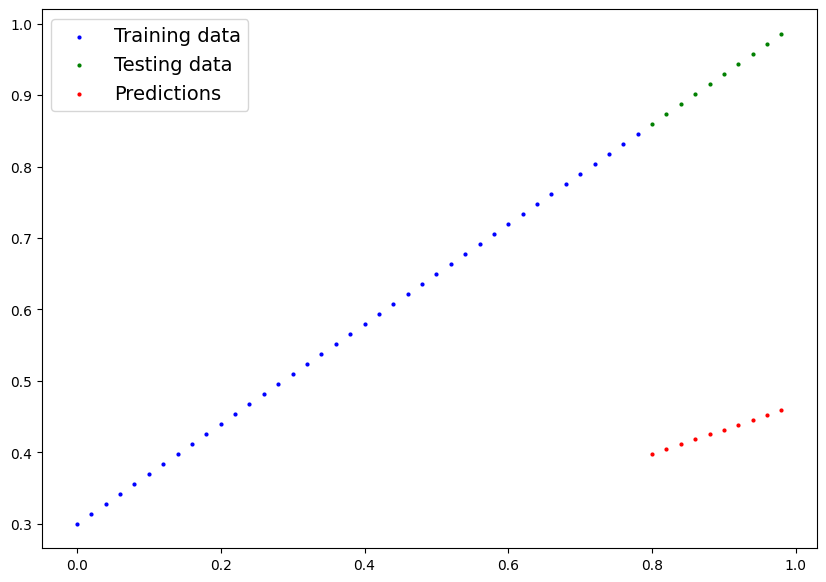

In [26]:
import matplotlib.pyplot as plt
plot_predictions(predictions=y_preds)

Train model

creating a loss function and optimizer in PyTorch
1. Loss function(손실함수) - 모델의 예측값이 실제 정답 레이블과 얼마나 다른지 측정 (값이 낮을수록 좋은 성능)
                          - (where does it live in PyTorch?) 다양한 내장 손실 함수들이 torch.nn 모듈 안에 있음 
                          - (common values) regression problems에는 MAE(평균 절대 오차)를 사용, torch.nn.L1Loss / 이진 분류 문제(binary classification problems)에는 Binary Cross Entropy(이진 교차 엔트로피)를 사용, torch.nn.BCELoss()
2. Optimizer(최적화 함수) - 모델이 loss(손실)을 가장 잘 줄일 수 있도록 내부 파라미터를 어떻게 업데이트할지 알려주는 역할
                        - (where does it live in PyTorch?) 다양한 최적화 함수들은 torch.optim 모듈에서 찾을 수 있음
                        - (common values) stochastic gradient descent(확률적 경사 하강법), torch.optim.SGD() / Adam optimizer, torch.optim.Adam()

                        + 어떤 종류의 문제를 다루고 있느냐에 따라 어떤 손실함수와 최적화함수를 사용할지가 달라짐
                        + 회귀 문제(regression problems)에서는 MAE(평균 절대 오차) 손실함수 (predicting a number)
                        + 분류 문제(classification problems)에서는 이진 크로스 엔트로피 손실함수(binary cross entropy loss function)(predicting one thing or another)

In [27]:
# torch.optim.SGD(params, lr)
# params : the target model parameters you'd like to optimize
# lr : learning rate, 이 값은 머신러닝 엔지니어에 의해 세팅되기 때문에 하이퍼파라미터(hyperparameter)라고 불리기도 함 / 보편적으로 자주 사용되는 시작값 (0.01, 0.001, 0.0001)
# learning rate scheduling : 학습이 진행되는 동안 learning rate를 조정하는 방법

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

creating an optimization loop in PyTorch  (training loop, testing loop)
training loop는 모델이 훈련 데이터를 거치며(going through), feature와 label 사이의 관계를 학습하는 과정을 포함
testing loop는 테스트 데이터를 거치며(going through), 모델이 훈련 데이터에서 학습한 패턴들이 얼마나 잘 작동하는지를 평가하는 과정을 포함
loop(루프)라고 부르는 이유는, 모델이 각 데이터셋의 모든 샘플들을 하나하나 반복해서 살펴보기 때문

PyTorch training loop
1. Forward pass(순전파) : 모델이 모든 훈련 데이터를 한 번 거치며, forward()함수에 정의된 계산을 수행
2. Calculate the loss(손실 계산) : 모델의 출력값(예측값)을 실제 정답과 비교하여 얼마나 틀렸는지를 평가
3. Zero gradients(기울기 초기화) : optimizer의 기울기들을 0으로 설정(기본적으로 이전 값들이 누적되기 때문) 현재 학습 단계에 맞게 다시 계산할 수 있도록 초기화
4. Perform backpropagation on the loss(손실에 대해 역전파 수행) : 손실값을 기준으로 각 모델 파라미터에 대한 기울기를 계산(역전파, backpropagation), backward()
5. Update the optimizer(gradient descent) : 손실 함수로부터 계산된 기울기를 기준으로 requires_grad = True인 파라미터들을 업데이트하여 모델 성능을 향상시킴


Rules of thumb(기본 원칙)
1. 손실 계산(calculate the loss), 손실에 대한 역전파 연산을 하기 전에(before performing backpropagation on it(loss.backward()))
2. 기울기를 0으로 초기화(optimizer.zero_gard()), 모든 모델 파라미터에 대해 손실 함수의 기울기를 계산하기 전에(loss.backward())
3. Step the optimizer(optimizer.step()), 손실 함수에 대해 역전파 연산을 한 이후에(loss.backward())

PyTorch Testing loop
1. Forward pass(순전파) : 모델이 테스트 데이터를 한 번 모두 거치며, 순전파 함수 연산을 수행함
2. Calculate the loss(손실 계산) : 모델의 출력(예측값)과 실제 정답(ground truth)을 비교하여 얼마나 틀렸는지를 평가 
3. Calculate evaluation metrics(optional)(평가 지표 계산-선택적) : 손실 값 외에도, 테스트 세트에 대한 정확도(accuracy) 등의 평가 지표들을 계산

+ testing loop는 backpropagation과 optimizer.step()을 수행하지 않음, 테스트 중에는 모델의 어떤 파라미터도 변경되지 않기 때문 (no parameters in the model are being changed during testing)
+ 테스트에서는 forward pass를 수행한 결과만이 중요함


optimizer.step()

전제조건
1. 파라미터는 requires_grad= True인 상태
2. .backward()를 통해 각 파라미터에 대해 gradient가 계산되어 있어야함
3. 기울기는 .grad 속성에 저장됨
내부에서 일어나는 연산은 선택되는 최적화 알고리즘에 따라 달라짐

In [ ]:
torch.manual_seed(42)

epochs=100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    model_0.train() # default state of model
    y_pred = model_0(X_train)                               
    loss = loss_fn(y_pred, y_train) # calculate the loss   # 새로운 계산 그래프를 생성(model_0,loss_fn), with구문의 .detach()의 영향을 받지 않음
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # progress the optimizer

    ### Testing
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # 예측값이 torch.float 데이터타입으로 나오므로, 비교하려면 같은 데이터타입으로 바꿔줘야함
        if epoch%10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())  # loss.detach() - 계산 그래프와 연결이 끊어짐(autograph가 이 값을 추적하지 않음)
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819


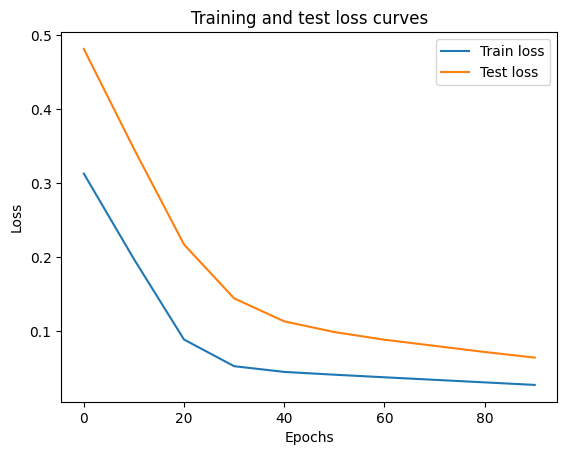

In [30]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();